<a href="https://colab.research.google.com/github/nannthd/project_AIEngineer/blob/main/train_yolov8_100epochs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
#!nvidia-smi

Mon May 27 17:05:57 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [3]:
!pip install pytube opencv-python-headless

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.8 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image

## Custom Training

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="AWtZRbYK04sFZNNZ1t4X")
project = rf.workspace("projectaiengineer").project("coconuts_dataset")
version = project.version(4)
dataset = version.download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.8 MB/s eta 0:00:00
Reason for being yanked: deprecated, use 4.8.0.76
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.10.0.82
    Uninstalling opencv-python-headless-4.10.0.82:
      Successfully uninstalled opencv-python-headless-4.10.0.82
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycl

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to coconuts_dataset-4 in yolov8:: 100%|██████████| 658/658 [00:00<00:00, 7385.76it/s]


In [6]:
%cat {dataset.location}/data.yaml

names:
- coconuts
nc: 1
roboflow:
  license: CC BY 4.0
  project: coconuts_dataset
  url: https://universe.roboflow.com/projectaiengineer/coconuts_dataset/dataset/4
  version: 4
  workspace: projectaiengineer
test: test/images
train: train/images
val: valid/images


In [7]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

In [8]:
%cat {dataset.location}/data.yaml

names:
- coconuts
nc: 1
roboflow:
  license: CC BY 4.0
  project: coconuts_dataset
  url: https://universe.roboflow.com/projectaiengineer/coconuts_dataset/dataset/4
  version: 4
test: ../test/images
train: ../train/images
val: ../valid/images


## Custom Training

In [9]:
%cd {HOME}

!yolo task=detect mode=train epochs=100 batch=16 plots=True \
model=yolov8m.pt \
data={dataset.location}/data.yaml \
optimizer=auto \
cache

/content
100% 49.7M/49.7M [00:00<00:00, 332MB/s]
New https://pypi.org/project/ultralytics/8.2.32 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/coconuts_dataset-4/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer

In [10]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1718356958.a194b2a41242.2373.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1350.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch1351.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch1352.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


In [11]:
from IPython.display import Image, clear_output

/content


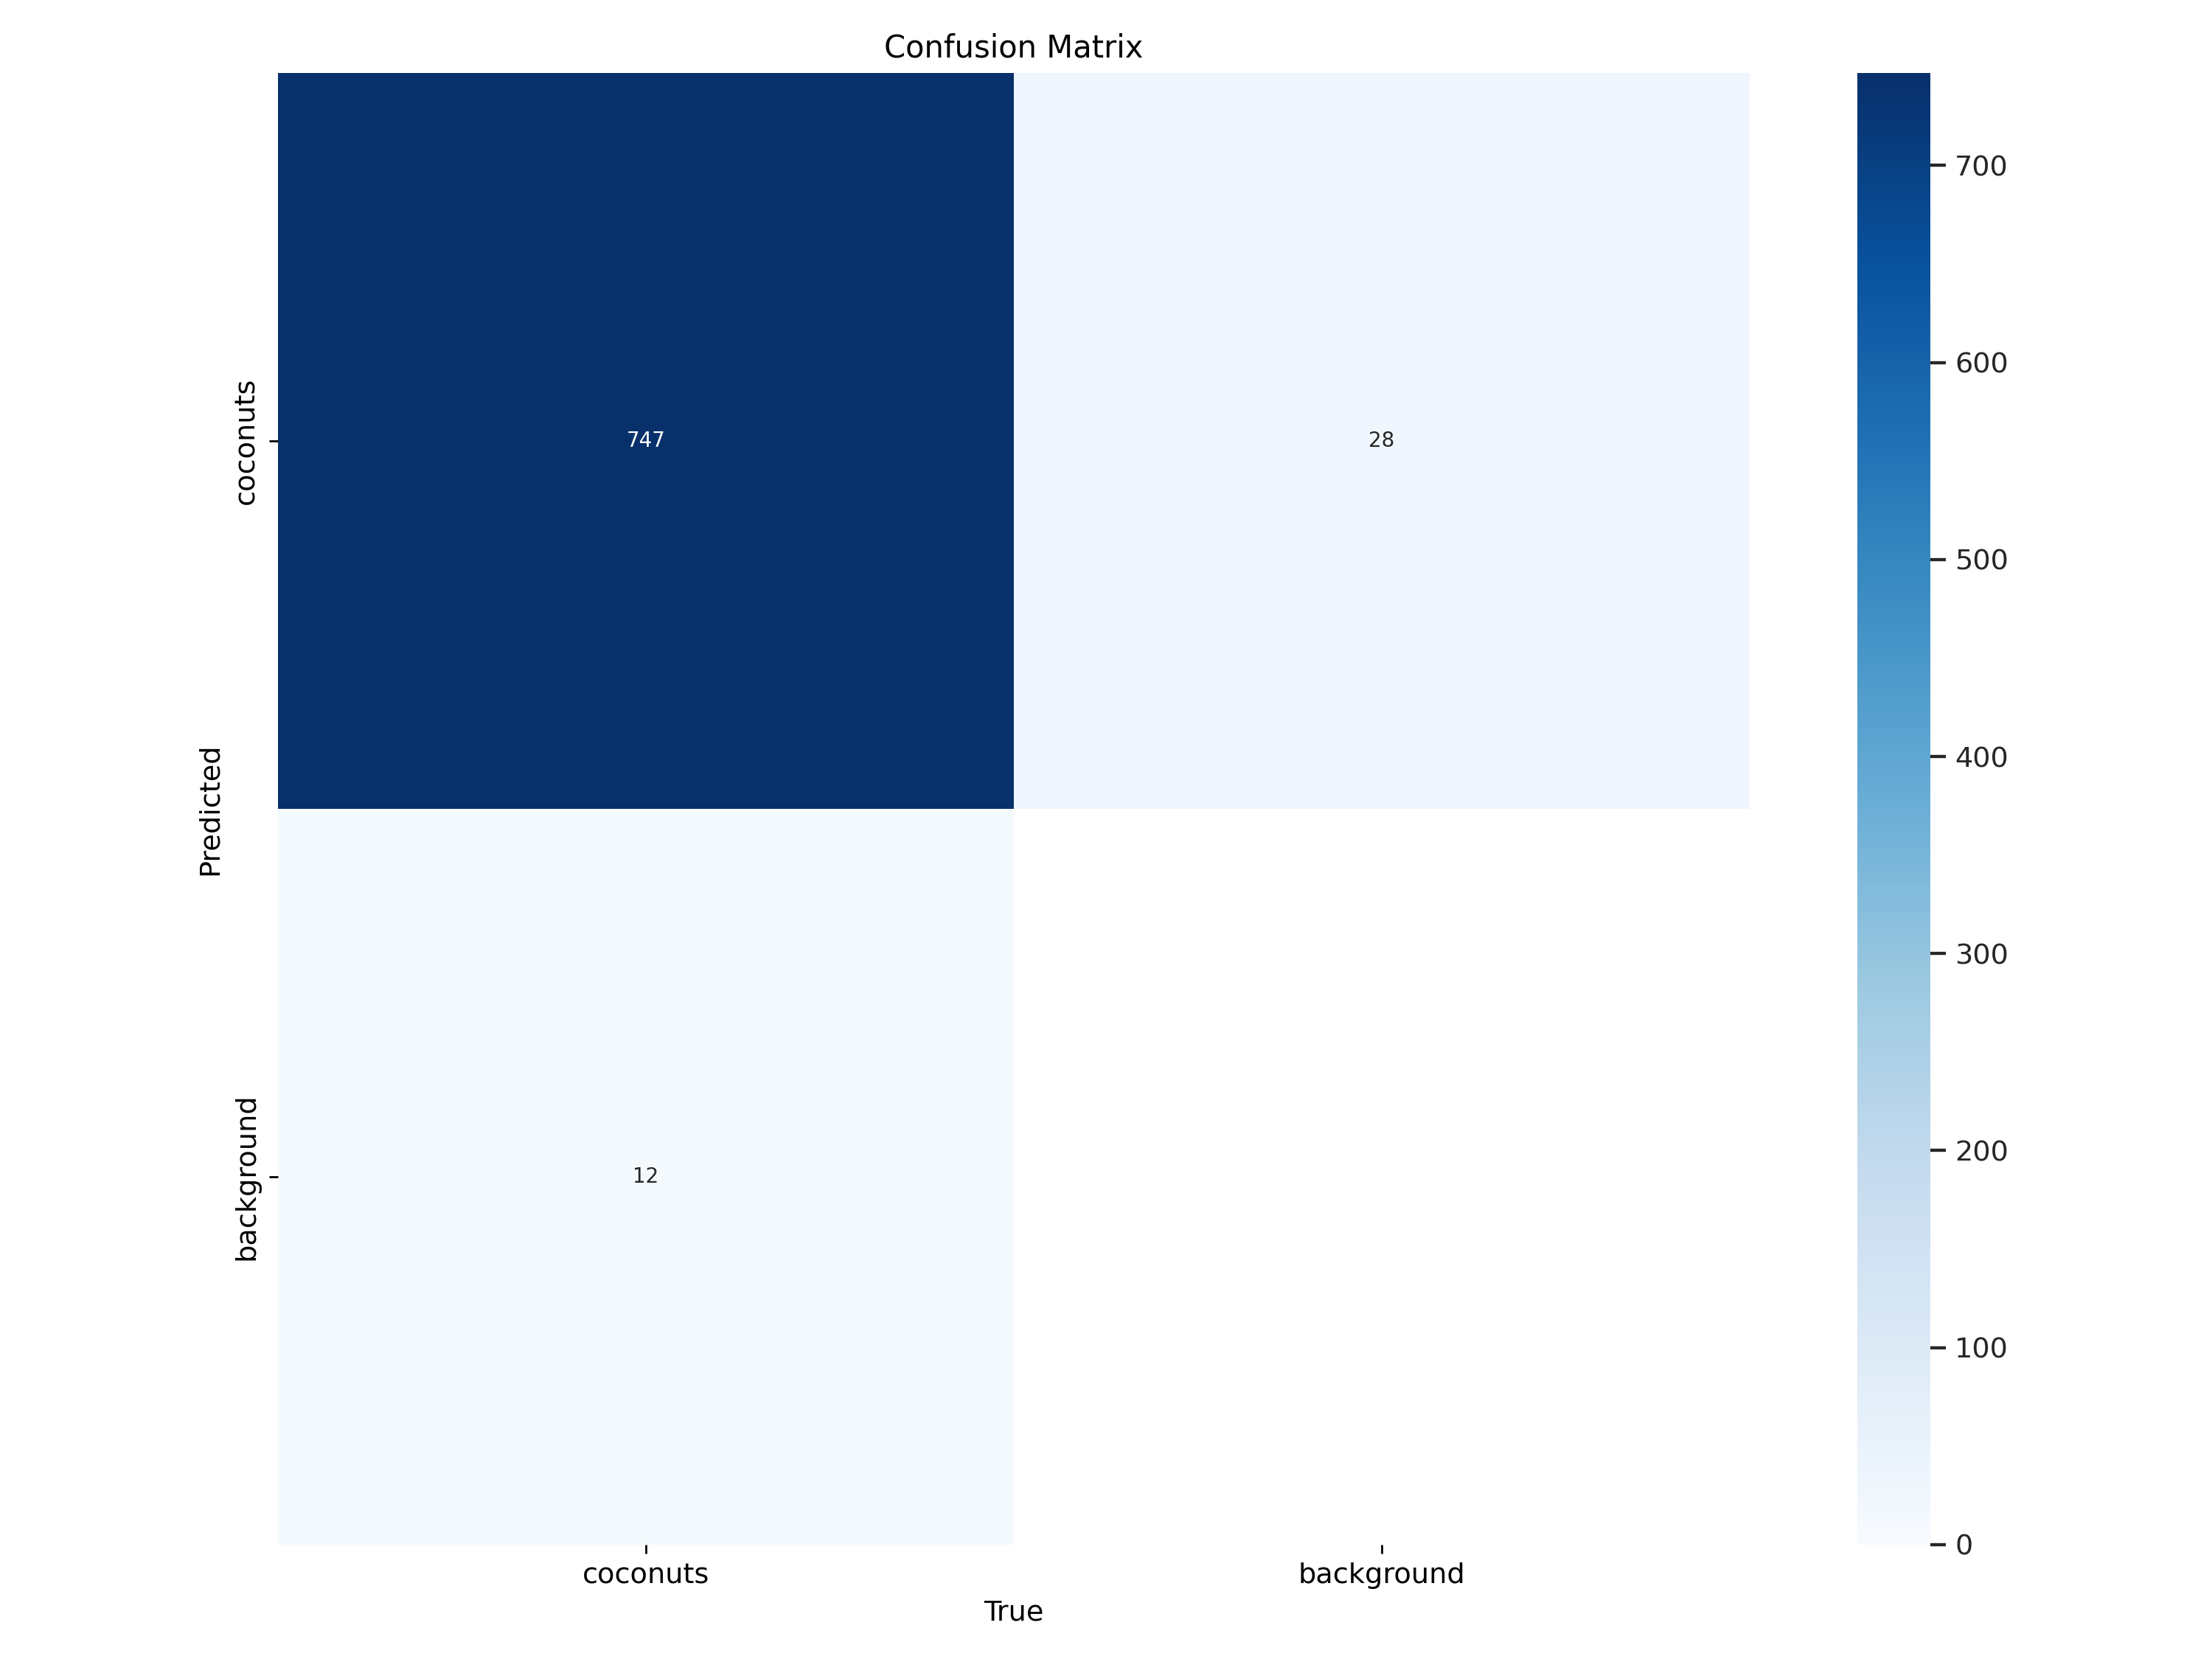

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


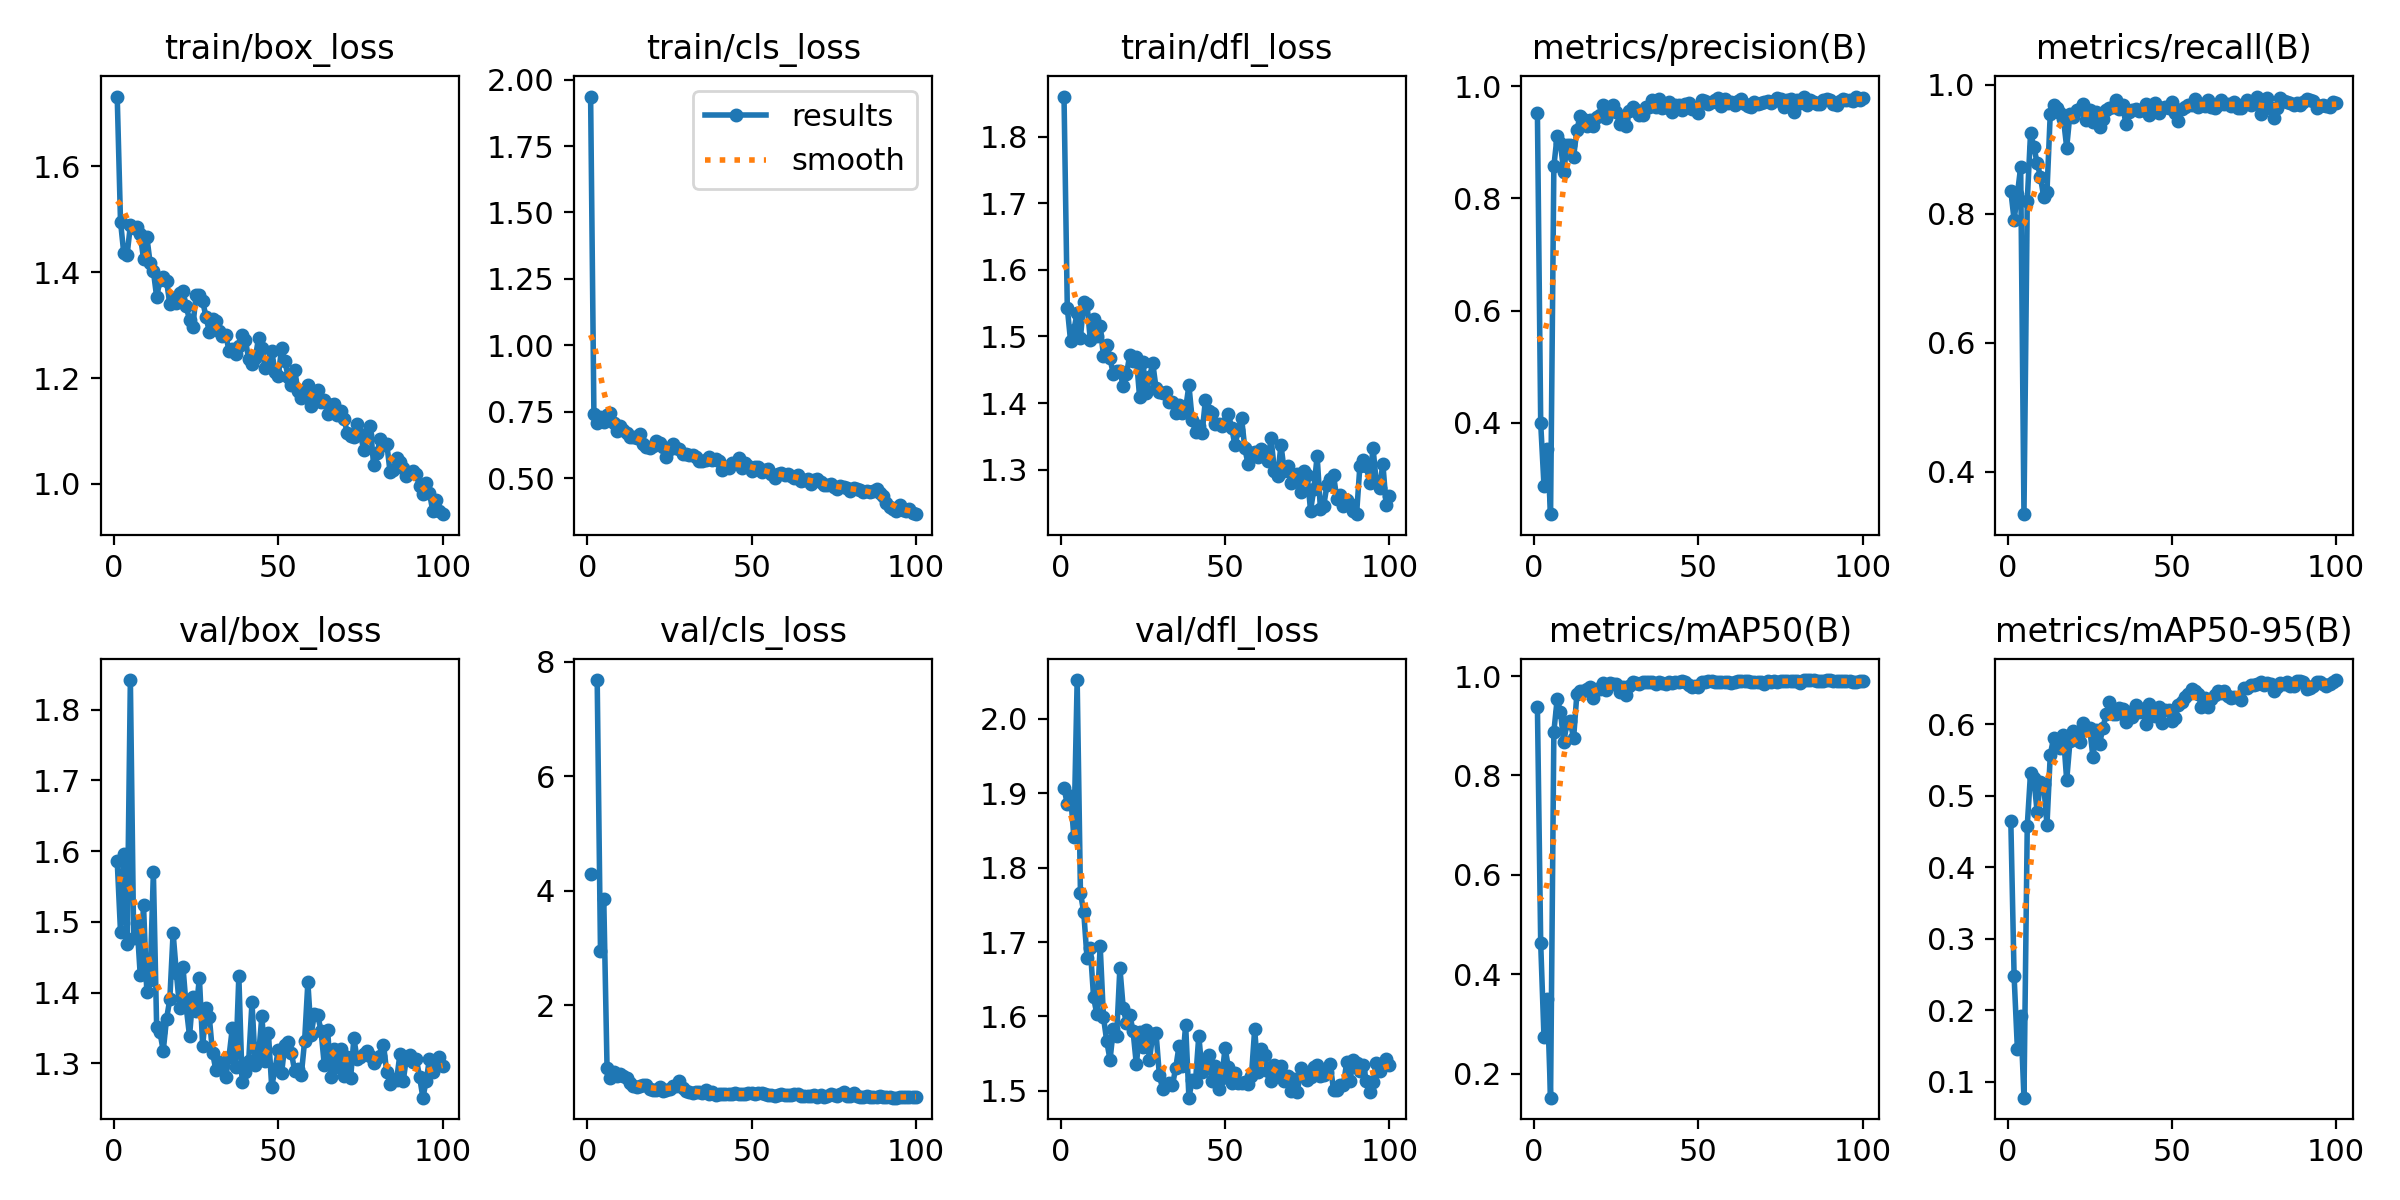

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


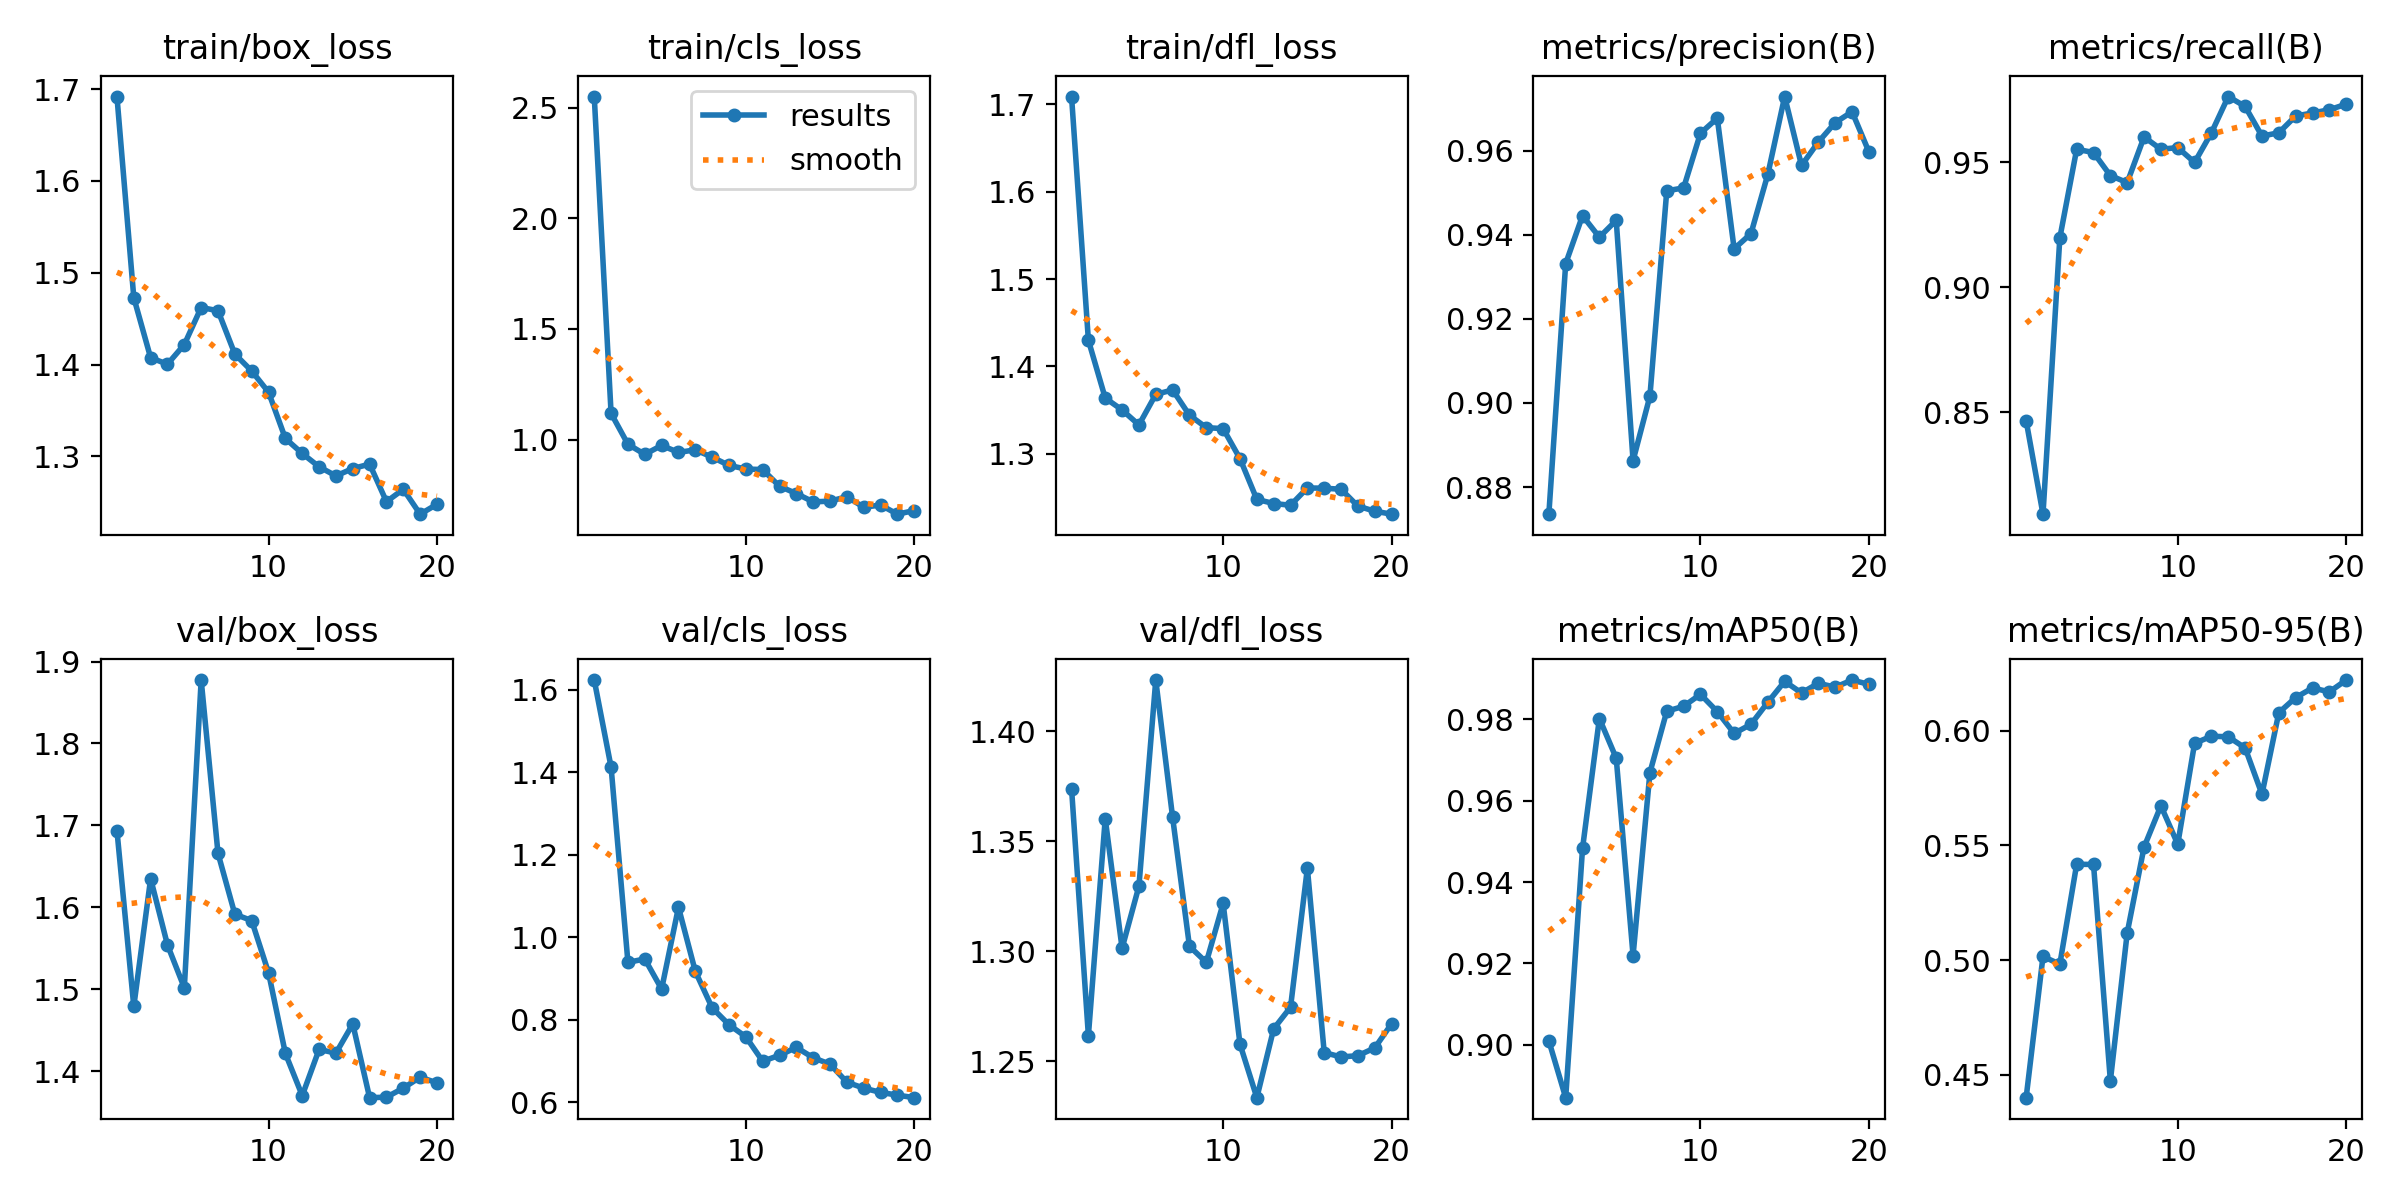

In [ ]:
# %cd {HOME}
# Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

## Inference with Custom Model

**NOTE:** Let's start by loading our newly trained model.

In [14]:
!pip install supervision
import supervision as sv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 3.9 MB/s eta 0:00:00


In [15]:
from ultralytics import YOLO

model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/valid/images",
    annotations_directory_path=f"{dataset.location}/valid/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

**NOTE:** Let's randomly select an image from our validation set and visualize the results.


WARNING ⚠️ NMS time limit 0.550s exceeded
0: 640x640 5 coconutss, 37.1ms
Speed: 9.1ms preprocess, 37.1ms inference, 834.5ms postprocess per image at shape (1, 3, 640, 640)


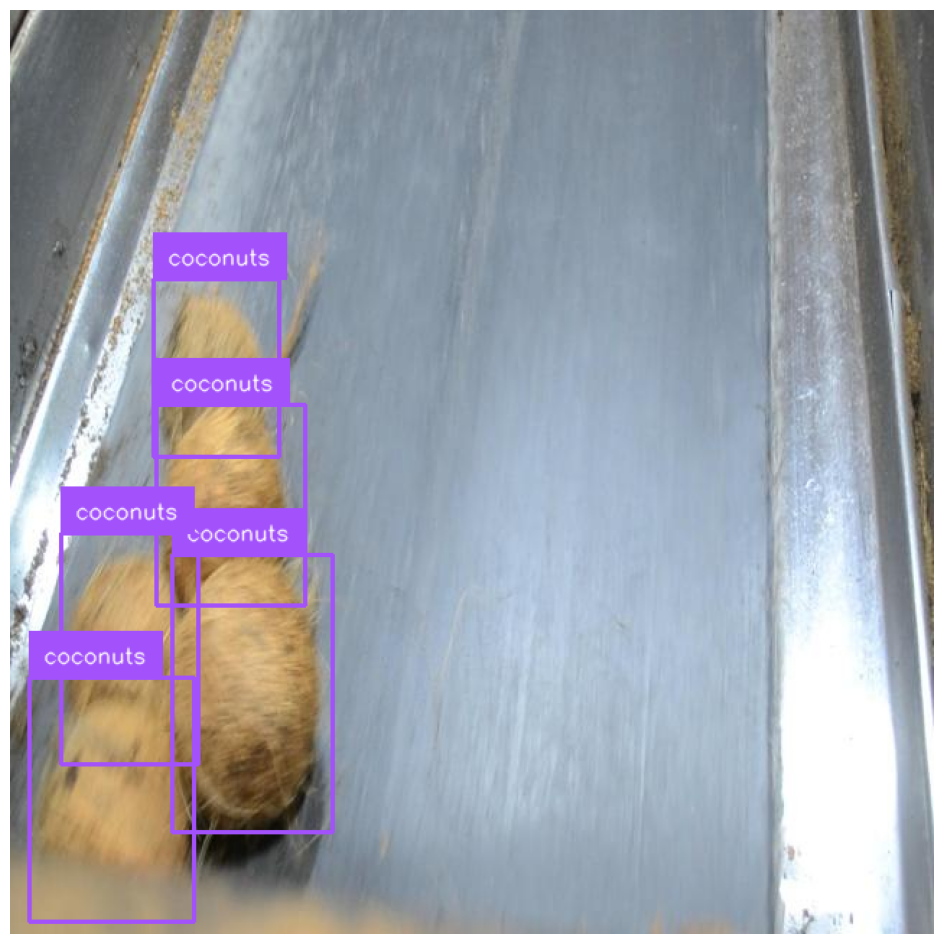

In [16]:
import random

random_image = random.choice(list(dataset.images.keys()))
random_image = dataset.images[random_image]

results = model(source=random_image, conf=0.25)[0]
detections = sv.Detections.from_ultralytics(results)

annotated_image = bounding_box_annotator.annotate(
    scene=random_image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [ ]:
pred = model.predict(random_image, save=True)
pred


0: 640x640 5 coconutss, 11.0ms
Speed: 3.3ms preprocess, 11.0ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'coconuts'}
 orig_img: array([[[ 40,  35,  36],
         [ 51,  49,  49],
         [125, 125, 125],
         ...,
         [ 81,  86,  87],
         [ 80,  85,  86],
         [ 73,  78,  79]],
 
        [[ 44,  39,  40],
         [ 79,  77,  77],
         [144, 144, 144],
         ...,
         [ 83,  88,  89],
         [ 79,  84,  85],
         [ 69,  74,  75]],
 
        [[ 58,  53,  54],
         [122, 120, 120],
         [169, 169, 169],
         ...,
         [ 90,  95,  96],
         [ 83,  88,  89],
         [ 69,  74,  75]],
 
        ...,
 
        [[119, 157, 181],
         [119, 157, 181],
         [117, 158, 181],
         ...,
         [139, 130, 120],
         [138, 129, 119],
         [139, 130, 120]],
 
        [[117, 158, 181],
         [117, 158, 181],
         [117, 158, 181],
         ...,
         [138, 129, 119],
 

#Tracking

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
%pip install ultralytics --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.6/780.6 kB 8.4 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.196
    Uninstalling ultralytics-8.0.196:
      Successfully uninstalled ultralytics-8.0.196


In [27]:
import cv2
from ultralytics import YOLO, solutions

In [28]:
model = YOLO("/content/runs/detect/train/weights/best.pt")
model.names

{0: 'coconuts'}

In [32]:
%pip install ultralytics

In [33]:
#ใช้อันนี้
import cv2

from ultralytics import YOLO, solutions

model = YOLO("/content/runs/detect/train/weights/best.pt")
cap = cv2.VideoCapture("/content/drive/MyDrive/coconut_model/Coconut Counter.mp4")
assert cap.isOpened(), "Error reading video file"
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))

line_points = [(20, 400), (1260, 400)]  # line or region points
classes_to_count = [0]

# Video writer
video_writer = cv2.VideoWriter("output.avi", cv2.VideoWriter_fourcc(*"mp4v"), fps, (w, h))

# Init Object Counter
counter = solutions.ObjectCounter(
    view_img=True,
    reg_pts=line_points,
    classes_names=model.names,
    view_in_counts=True,
    view_out_counts=True,
    draw_tracks=True,
    line_thickness=2,
)

while cap.isOpened():
    success, im0 = cap.read()
    if not success:
        print("Video frame is empty or video processing has been successfully completed.")
        break
    tracks = model.track(im0, persist=True, show=False, classes=classes_to_count)

    im0 = counter.start_counting(im0, tracks)
    video_writer.write(im0)

cap.release()
video_writer.release()
cv2.destroyAllWindows()

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



Line Counter Initiated.


ImportError: cannot import name 'batch_probiou' from 'ultralytics.utils.metrics' (/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py)

#Tracking and Line Counting